## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import pickle
import warnings
warnings.filterwarnings('ignore')

## Load Data

In [5]:
df = pd.read_csv("flood_dataset.csv")
df.head()

,Temp,Humidity,Cloud Cover,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec,avgjune,sub,flood
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0


In [7]:
df.shape

(115, 11)

In [9]:
# Renaming Columns
df.rename(columns={"Temp": "Temperature","Humidity":"Humidity","Cloud Cover":"Cloud_cover","ANNUAL":"Annual_rainfall",
                   "Jan-Feb":"Jan-Feb_rainfall","Mar-May":"Mar-May_rainfall","Jun-Sep":"Jun-Sep_rainfall",
                   "Oct-Dec":"Oct-Dec_rainfall","avgjune":"Avg_june_rainfall","sub":"Sub_surface_water_level","flood":"Flood_risk"}, inplace=True)

## Exploratory Data Analysis

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature              115 non-null    int64  
 1   Humidity                 115 non-null    int64  
 2   Cloud_cover              115 non-null    int64  
 3   Annual_rainfall          115 non-null    float64
 4   Jan-Feb_rainfall         115 non-null    float64
 5   Mar-May_rainfall         115 non-null    float64
 6   Jun-Sep_rainfall         115 non-null    float64
 7   Oct-Dec_rainfall         115 non-null    float64
 8   Avg_june_rainfall        115 non-null    float64
 9   Sub_surface_water_level  115 non-null    float64
 10  Flood_risk               115 non-null    int64  
dtypes: float64(7), int64(4)
memory usage: 10.0 KB


In [14]:
df.describe()

,Temperature,Humidity,Cloud_cover,Annual_rainfall,Jan-Feb_rainfall,Mar-May_rainfall,Jun-Sep_rainfall,Oct-Dec_rainfall,Avg_june_rainfall,Sub_surface_water_level,Flood_risk
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,29.600000,73.852174,36.286957,2925.487826,27.739130,377.253913,2022.840870,497.636522,218.100870,439.801739,0.139130
std,1.122341,2.947623,4.330158,422.112193,22.361032,151.091850,386.254397,129.860643,62.547597,210.438813,0.347597
min,28.000000,70.000000,30.000000,2068.800000,0.300000,89.900000,1104.300000,166.600000,65.600000,34.200000,0.000000
25%,29.000000,71.000000,32.500000,2627.900000,10.250000,276.750000,1768.850000,407.450000,179.666667,295.000000,0.000000
50%,30.000000,74.000000,36.000000,2937.500000,20.500000,342.000000,1948.700000,501.500000,211.033333,430.600000,0.000000
75%,31.000000,76.000000,40.000000,3164.100000,41.600000,442.300000,2242.900000,584.550000,263.833333,577.650000,0.000000
max,31.000000,79.000000,44.000000,4257.800000,98.100000,915.200000,3451.300000,823.300000,366.066667,982.700000,1.000000


In [16]:
# Finding Unique Values
df.nunique()

Temperature                  4
Humidity                    10
Cloud_cover                 15
Annual_rainfall            115
Jan-Feb_rainfall           103
Mar-May_rainfall           111
Jun-Sep_rainfall           113
Oct-Dec_rainfall           115
Avg_june_rainfall          113
Sub_surface_water_level    114
Flood_risk                   2
dtype: int64

In [18]:
df.duplicated().sum()

0

- There are zero duplicate rows present in the dataset

In [21]:
# Finding Missing Values
print("Missing Values Per Column")
df.isnull().sum()

Missing Values Per Column


Temperature                0
Humidity                   0
Cloud_cover                0
Annual_rainfall            0
Jan-Feb_rainfall           0
Mar-May_rainfall           0
Jun-Sep_rainfall           0
Oct-Dec_rainfall           0
Avg_june_rainfall          0
Sub_surface_water_level    0
Flood_risk                 0
dtype: int64

Uni-Variate Analysis




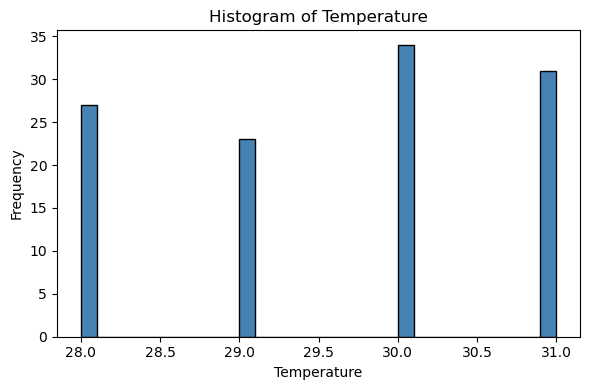

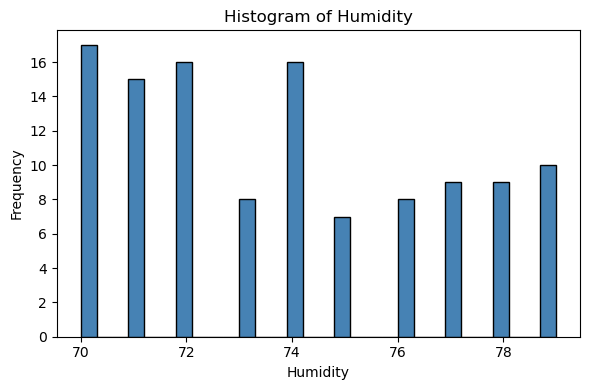

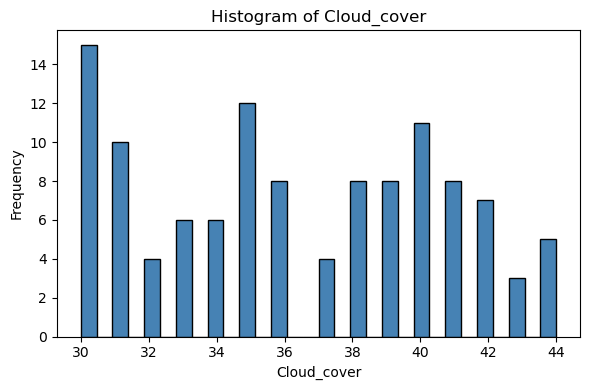

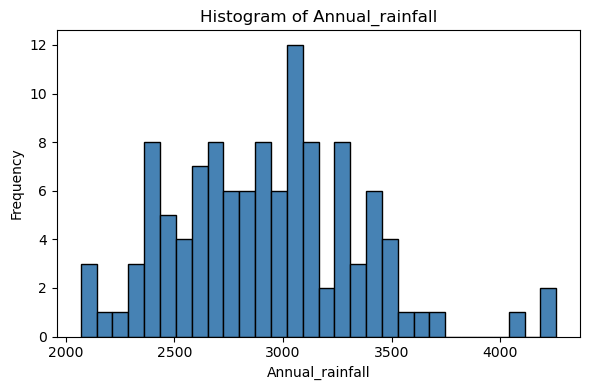

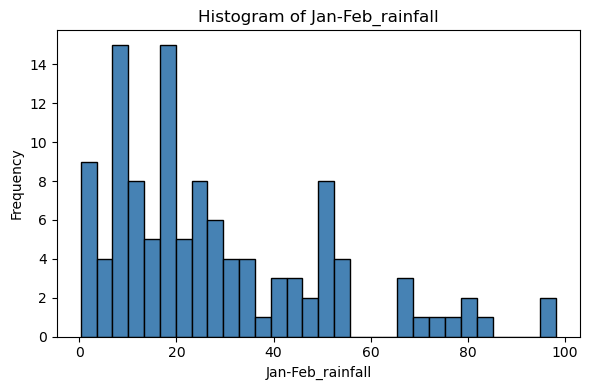

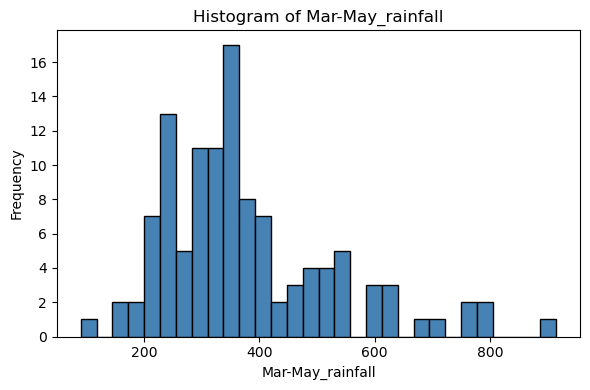

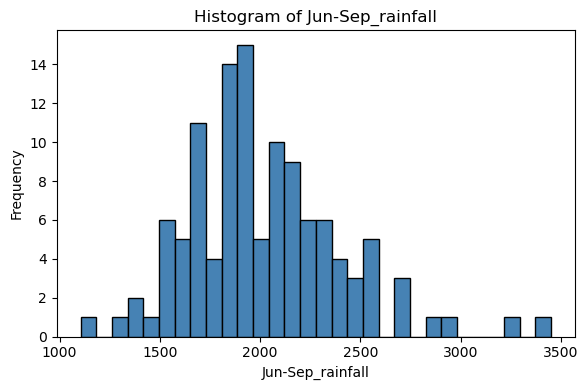

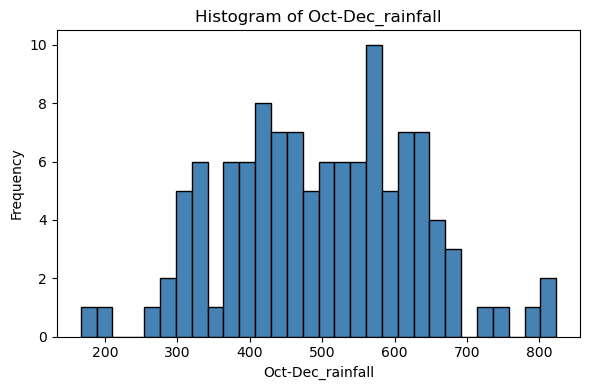

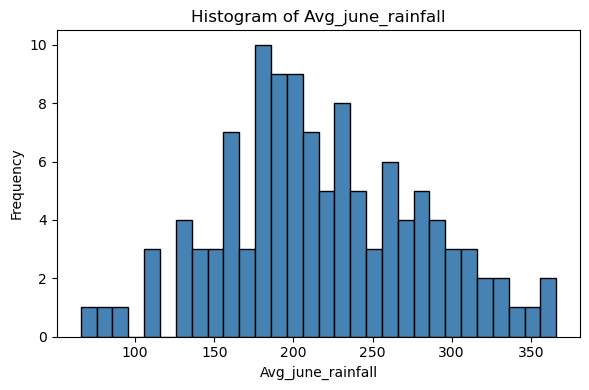

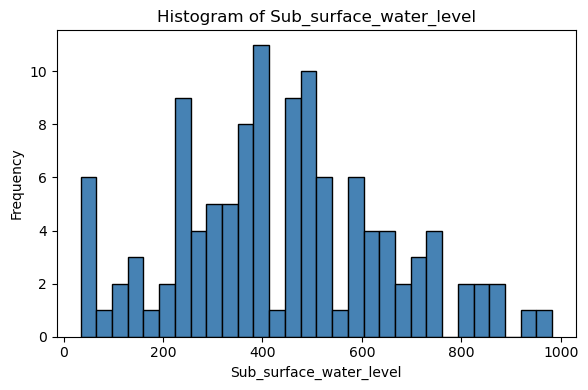

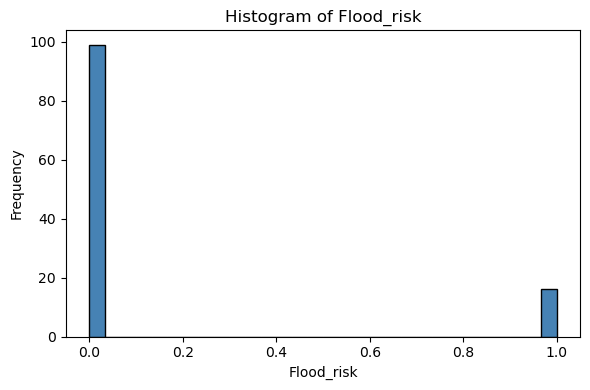

In [23]:
# Uni-Variate Analysis
print("Uni-Variate Analysis")

columns = ["Temperature","Humidity","Cloud_cover","Annual_rainfall","Jan-Feb_rainfall",
           "Mar-May_rainfall","Jun-Sep_rainfall","Oct-Dec_rainfall","Avg_june_rainfall","Sub_surface_water_level","Flood_risk"]

# Histogram
for col in columns:
  print("\n")
  plt.figure(figsize=(6, 4))
  plt.hist(df[col], bins=30, color='#4682B4', edgecolor='black')
  plt.title(f"Histogram of {col}")
  plt.xlabel(f"{col}")
  plt.ylabel("Frequency")
  plt.tight_layout()
  plt.show()

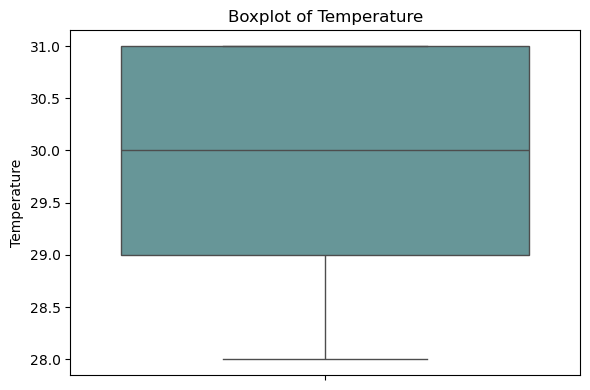

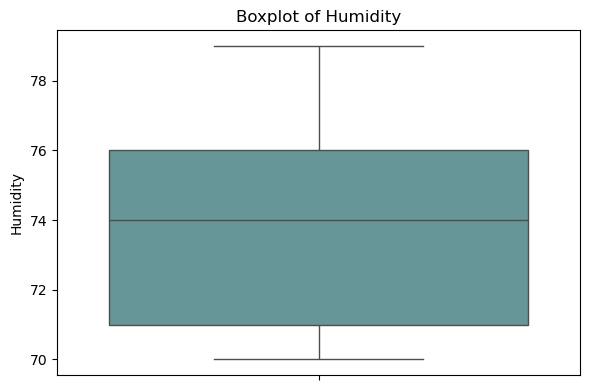

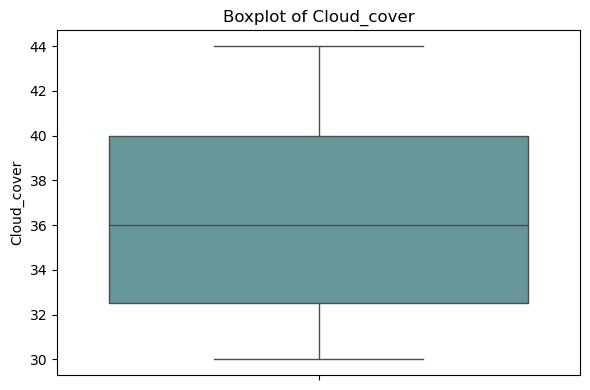

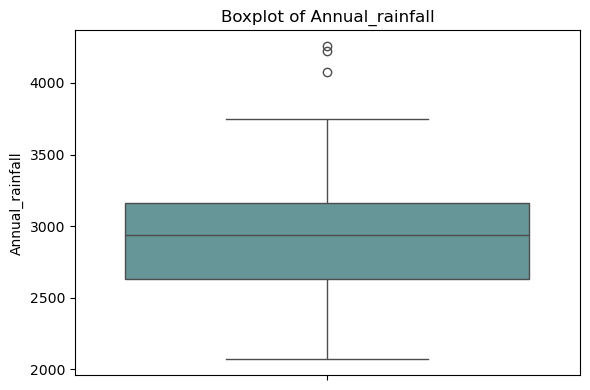

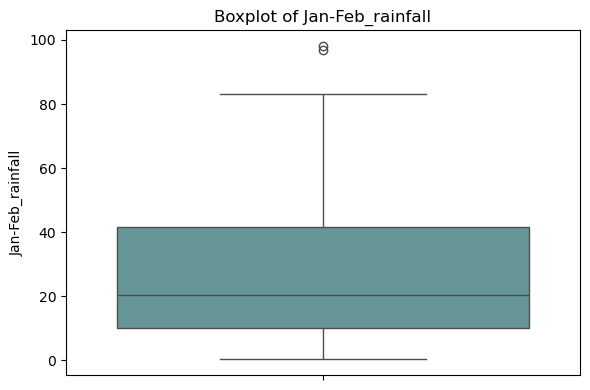

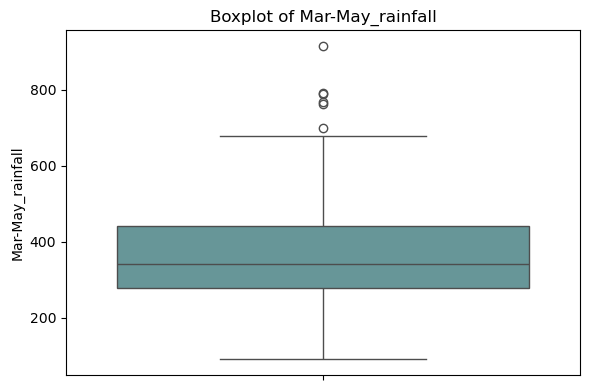

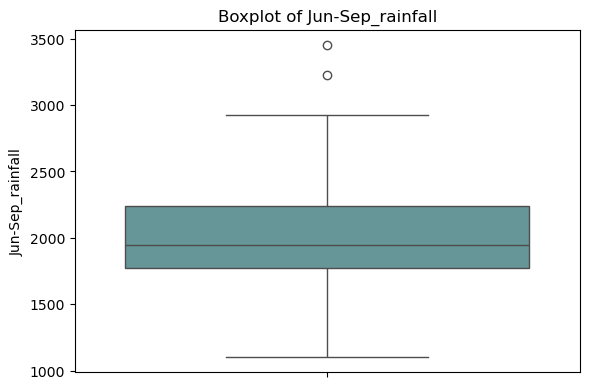

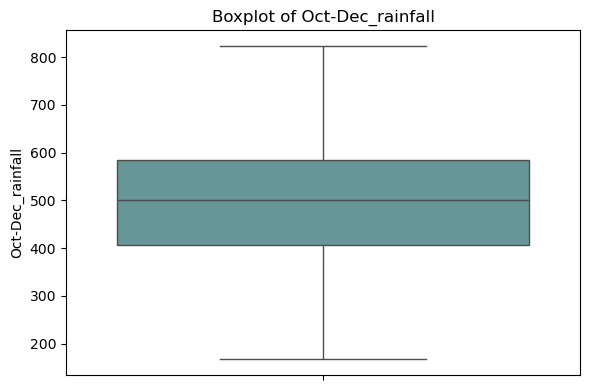

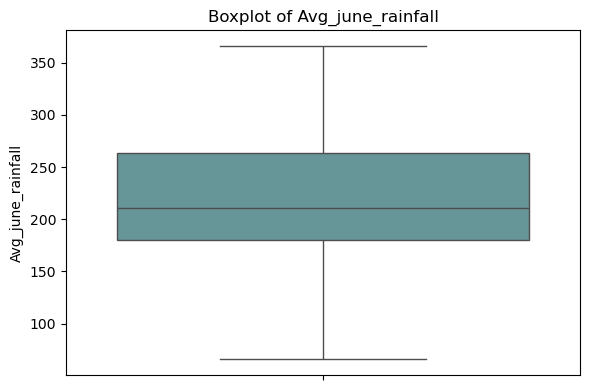

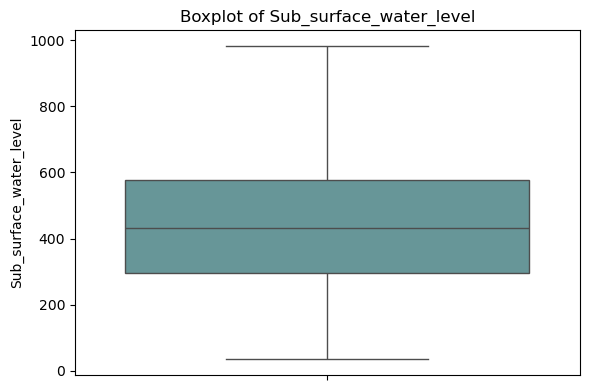

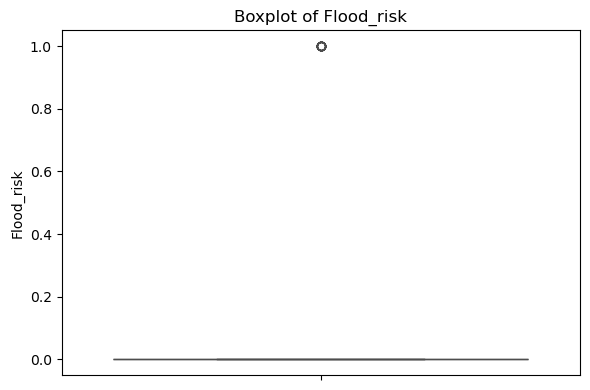

In [25]:
# Boxplot
columns = ["Temperature","Humidity","Cloud_cover","Annual_rainfall","Jan-Feb_rainfall",
           "Mar-May_rainfall","Jun-Sep_rainfall","Oct-Dec_rainfall","Avg_june_rainfall","Sub_surface_water_level","Flood_risk"]

for col in columns:
  print("\n")
  plt.figure(figsize=(6, 4))
  sns.boxplot(y=df[col], color='#5F9EA0')
  plt.title(f"Boxplot of {col}")
  plt.tight_layout()
  plt.show()

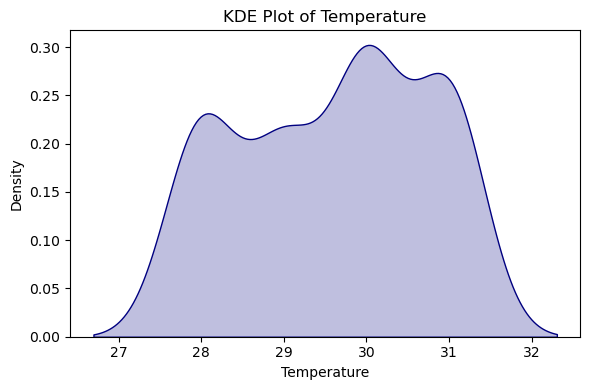

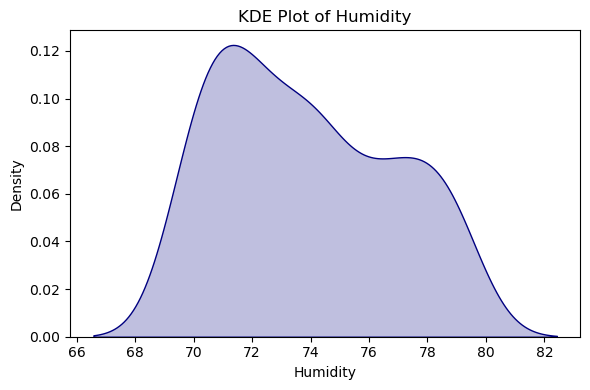

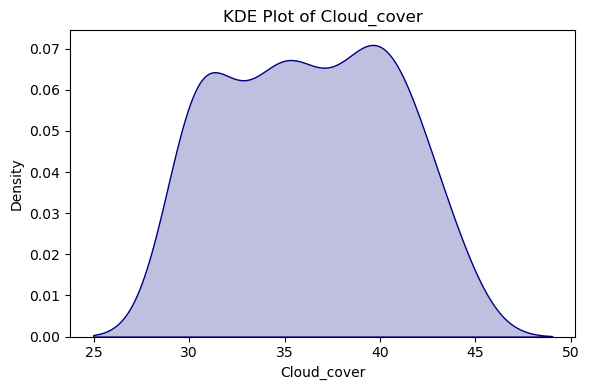

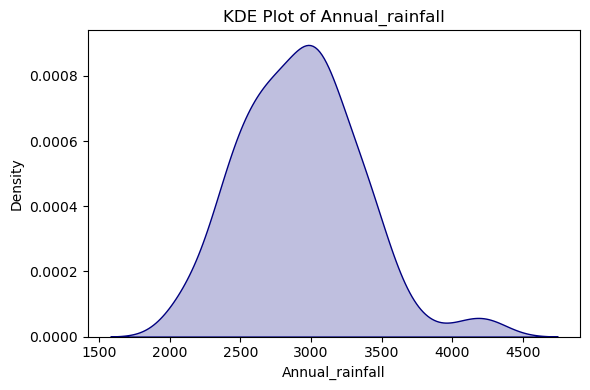

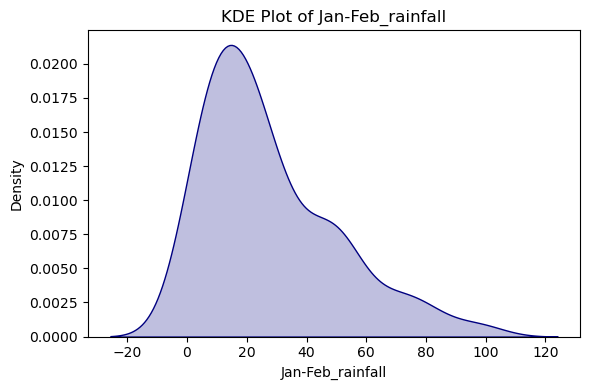

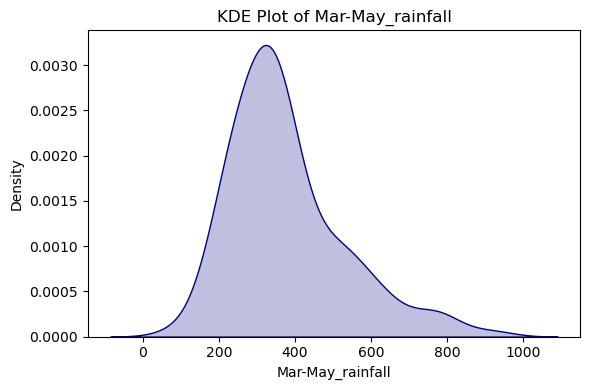

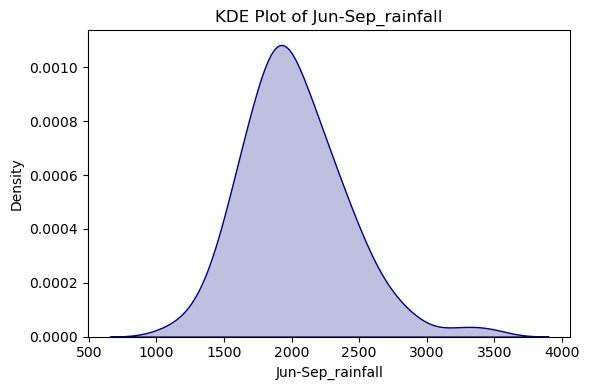

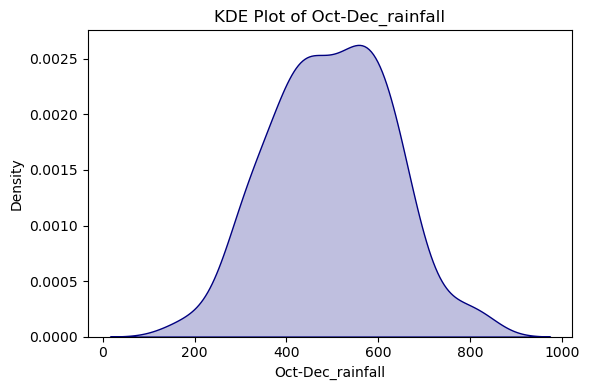

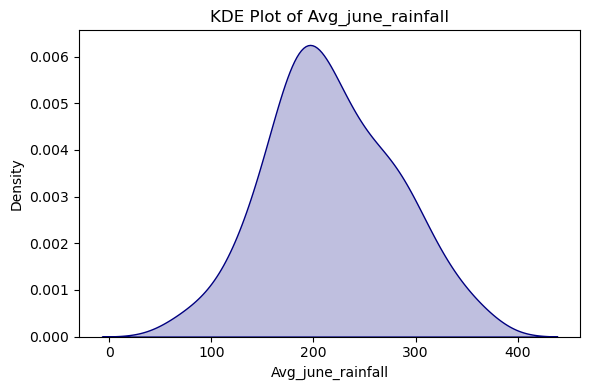

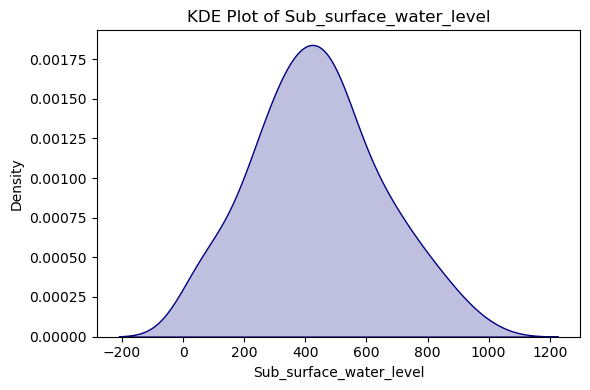

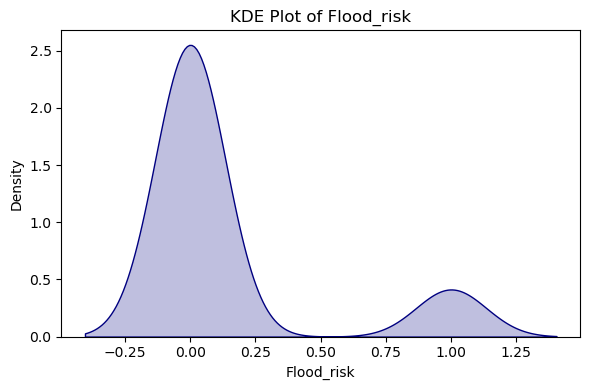

In [27]:
# KDE Plot
columns = ["Temperature","Humidity","Cloud_cover","Annual_rainfall","Jan-Feb_rainfall",
           "Mar-May_rainfall","Jun-Sep_rainfall","Oct-Dec_rainfall","Avg_june_rainfall","Sub_surface_water_level","Flood_risk"]

for col in columns:
  print("\n")
  plt.figure(figsize=(6, 4))
  sns.kdeplot(df[col], fill=True, color='navy')
  plt.title(f"KDE Plot of {col}")
  plt.xlabel(f"{col}")
  plt.tight_layout()
  plt.show()

Bi-Variate Analysis




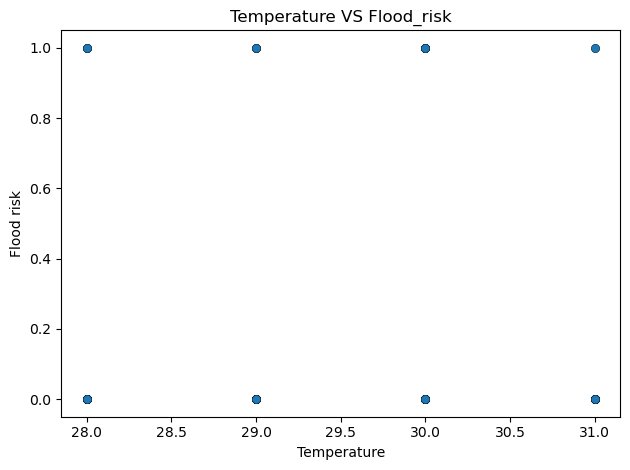

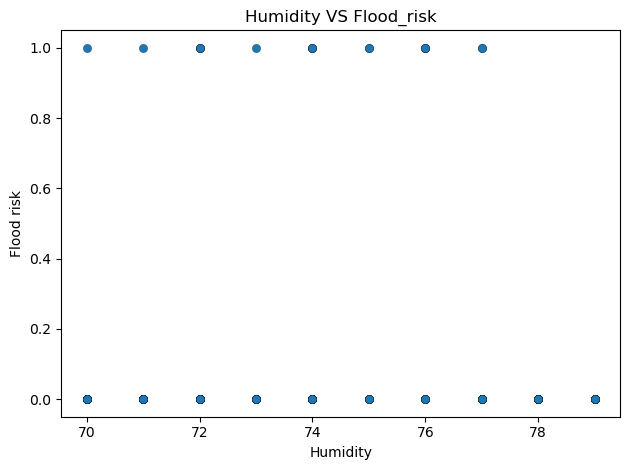

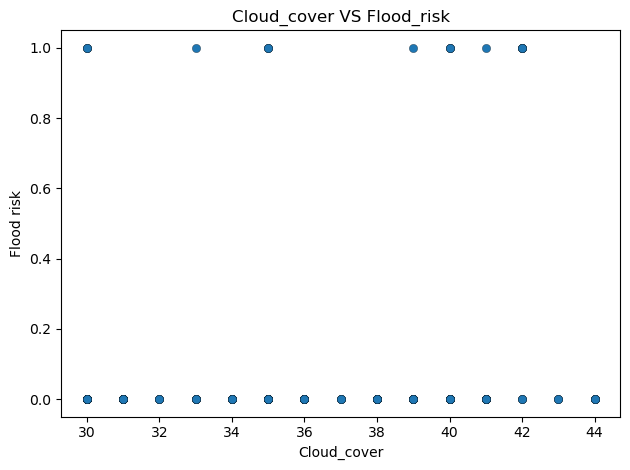

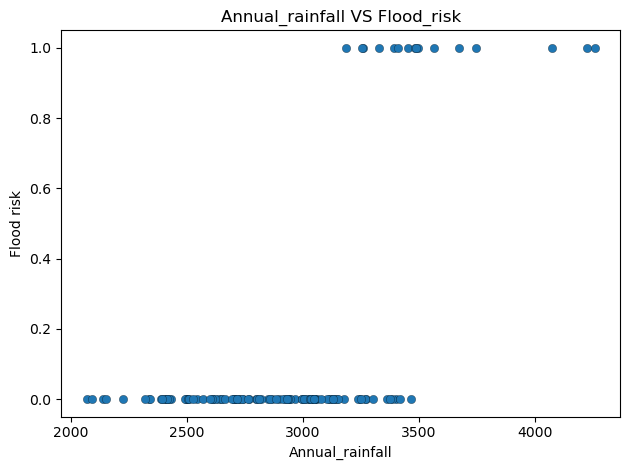

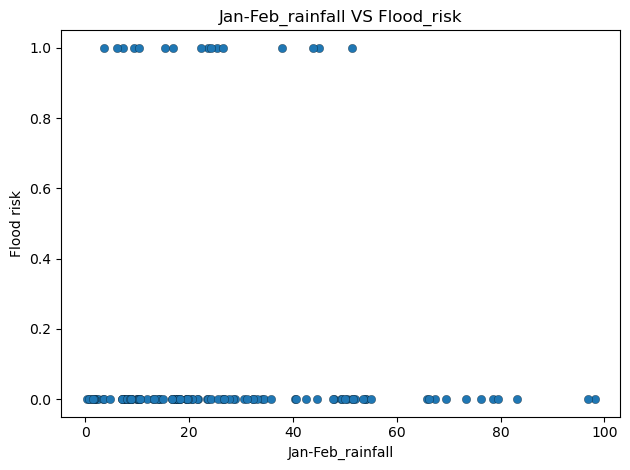

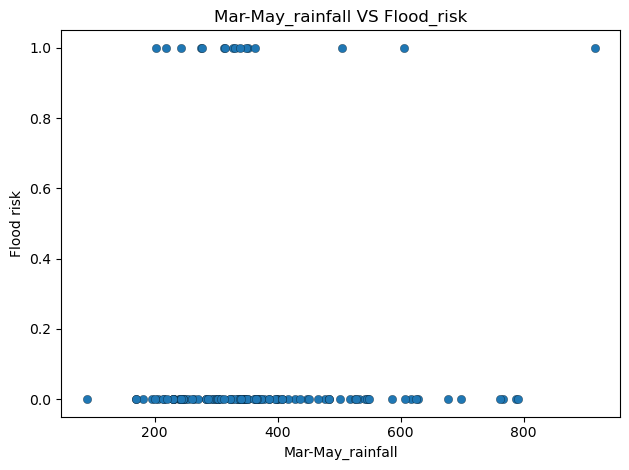

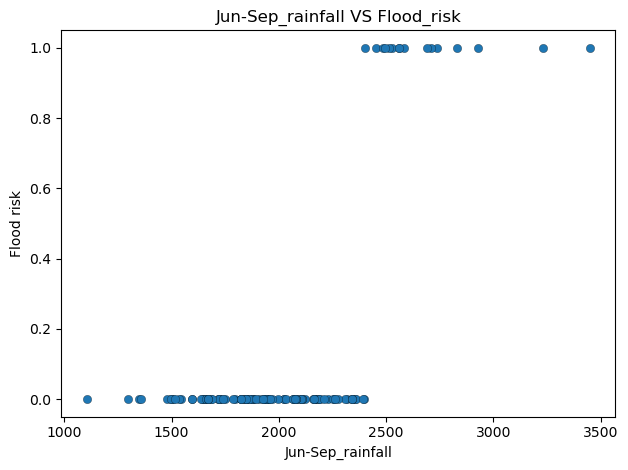

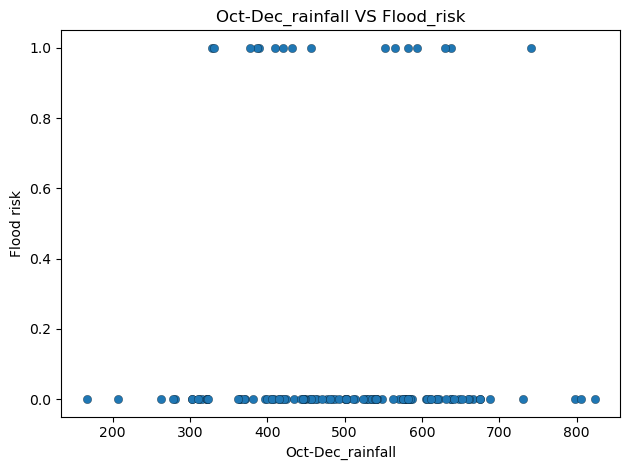

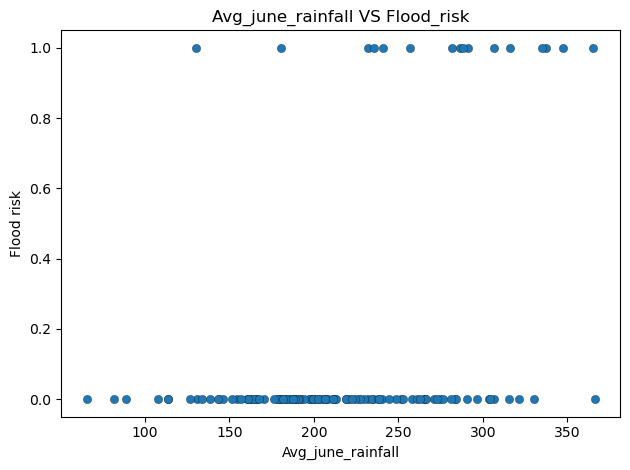

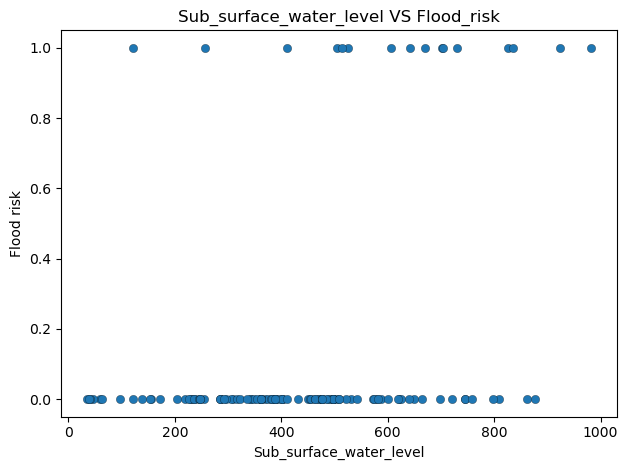

In [29]:
# Bi-Variate Analysis
print("Bi-Variate Analysis")

columns = ["Temperature","Humidity","Cloud_cover","Annual_rainfall","Jan-Feb_rainfall",
           "Mar-May_rainfall","Jun-Sep_rainfall","Oct-Dec_rainfall","Avg_june_rainfall","Sub_surface_water_level"]

for col in columns:
  print("\n")
  sns.scatterplot(x= df[col], y=df["Flood_risk"], edgecolor="black", linewidth=0.2,)
  plt.title(f'{col} VS Flood_risk')
  plt.xlabel(f'{col}')
  plt.ylabel('Flood risk')
  plt.tight_layout()
  plt.show()

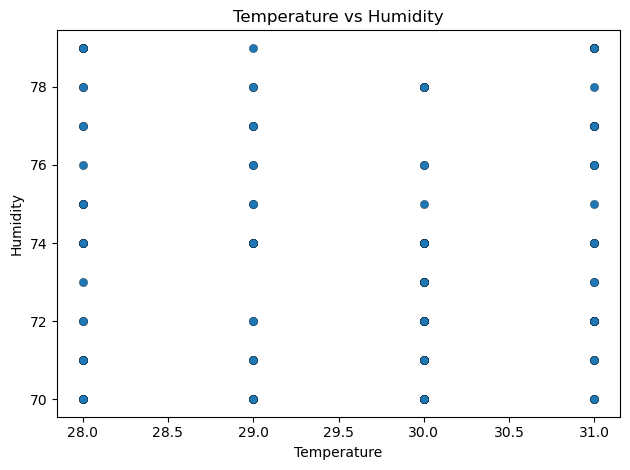

In [31]:
sns.scatterplot(x= df["Temperature"], y=df["Humidity"], edgecolor="black", linewidth=0.2,)
plt.title(f'Temperature vs Humidity')
plt.xlabel(f'Temperature')
plt.ylabel('Humidity')
plt.tight_layout()
plt.show()

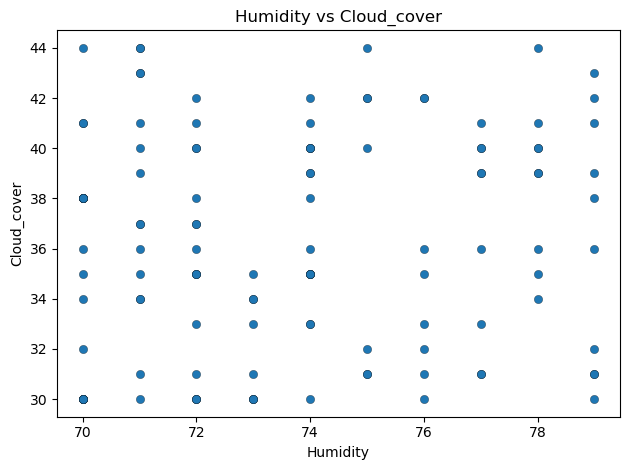

In [33]:
sns.scatterplot(x= df["Humidity"], y=df["Cloud_cover"], edgecolor="black", linewidth=0.2,)
plt.title(f'Humidity vs Cloud_cover')
plt.xlabel(f"Humidity")
plt.ylabel('Cloud_cover')
plt.tight_layout()
plt.show()

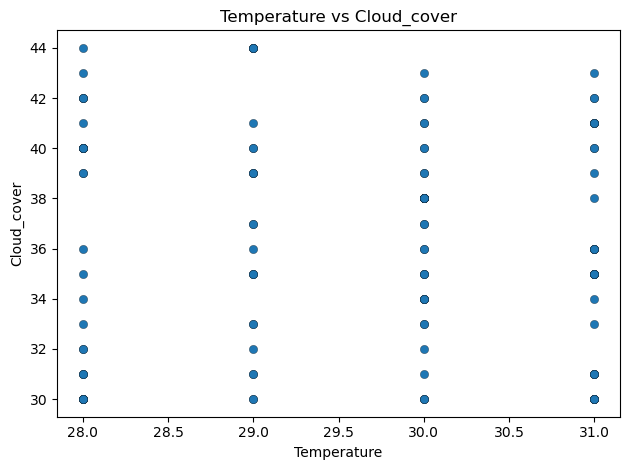

In [35]:
sns.scatterplot(x= df["Temperature"], y=df["Cloud_cover"], edgecolor="black", linewidth=0.2,)
plt.title(f'Temperature vs Cloud_cover')
plt.xlabel(f"Temperature")
plt.ylabel('Cloud_cover')
plt.tight_layout()
plt.show()

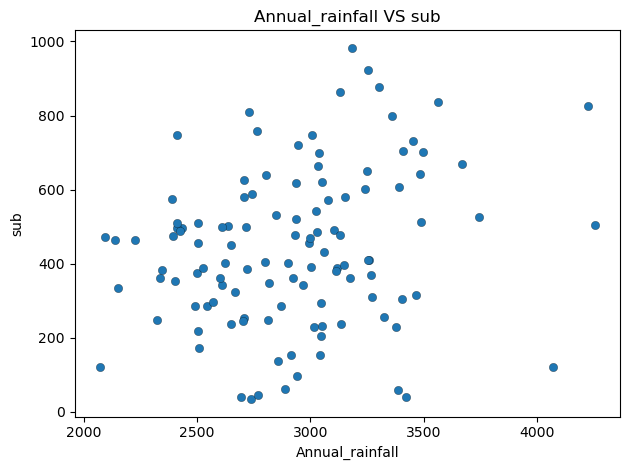

In [37]:
sns.scatterplot(x= df["Annual_rainfall"], y=df["Sub_surface_water_level"], edgecolor="black", linewidth=0.2,)
plt.title(f'Annual_rainfall VS sub')
plt.xlabel(f'Annual_rainfall')
plt.ylabel('sub')
plt.tight_layout()
plt.show()

Multi-Variate Analysis


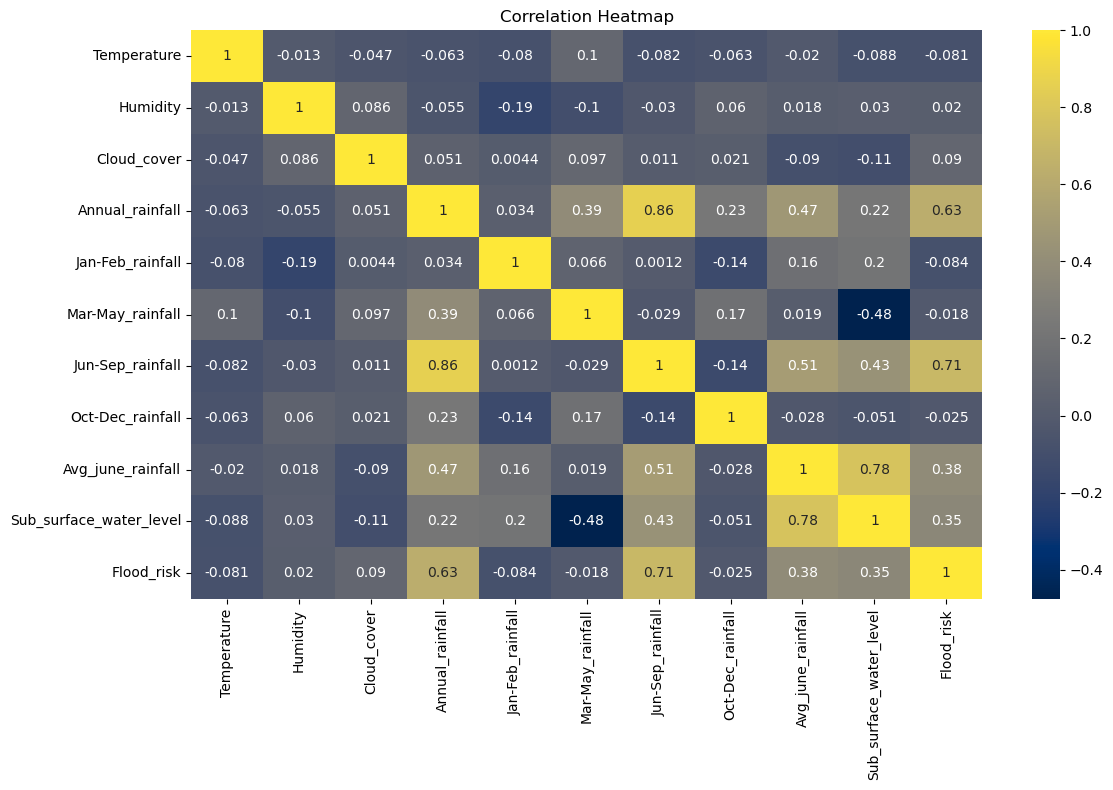

In [39]:
# Multi-Variate Analysis
print("Multi-Variate Analysis")

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="cividis")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

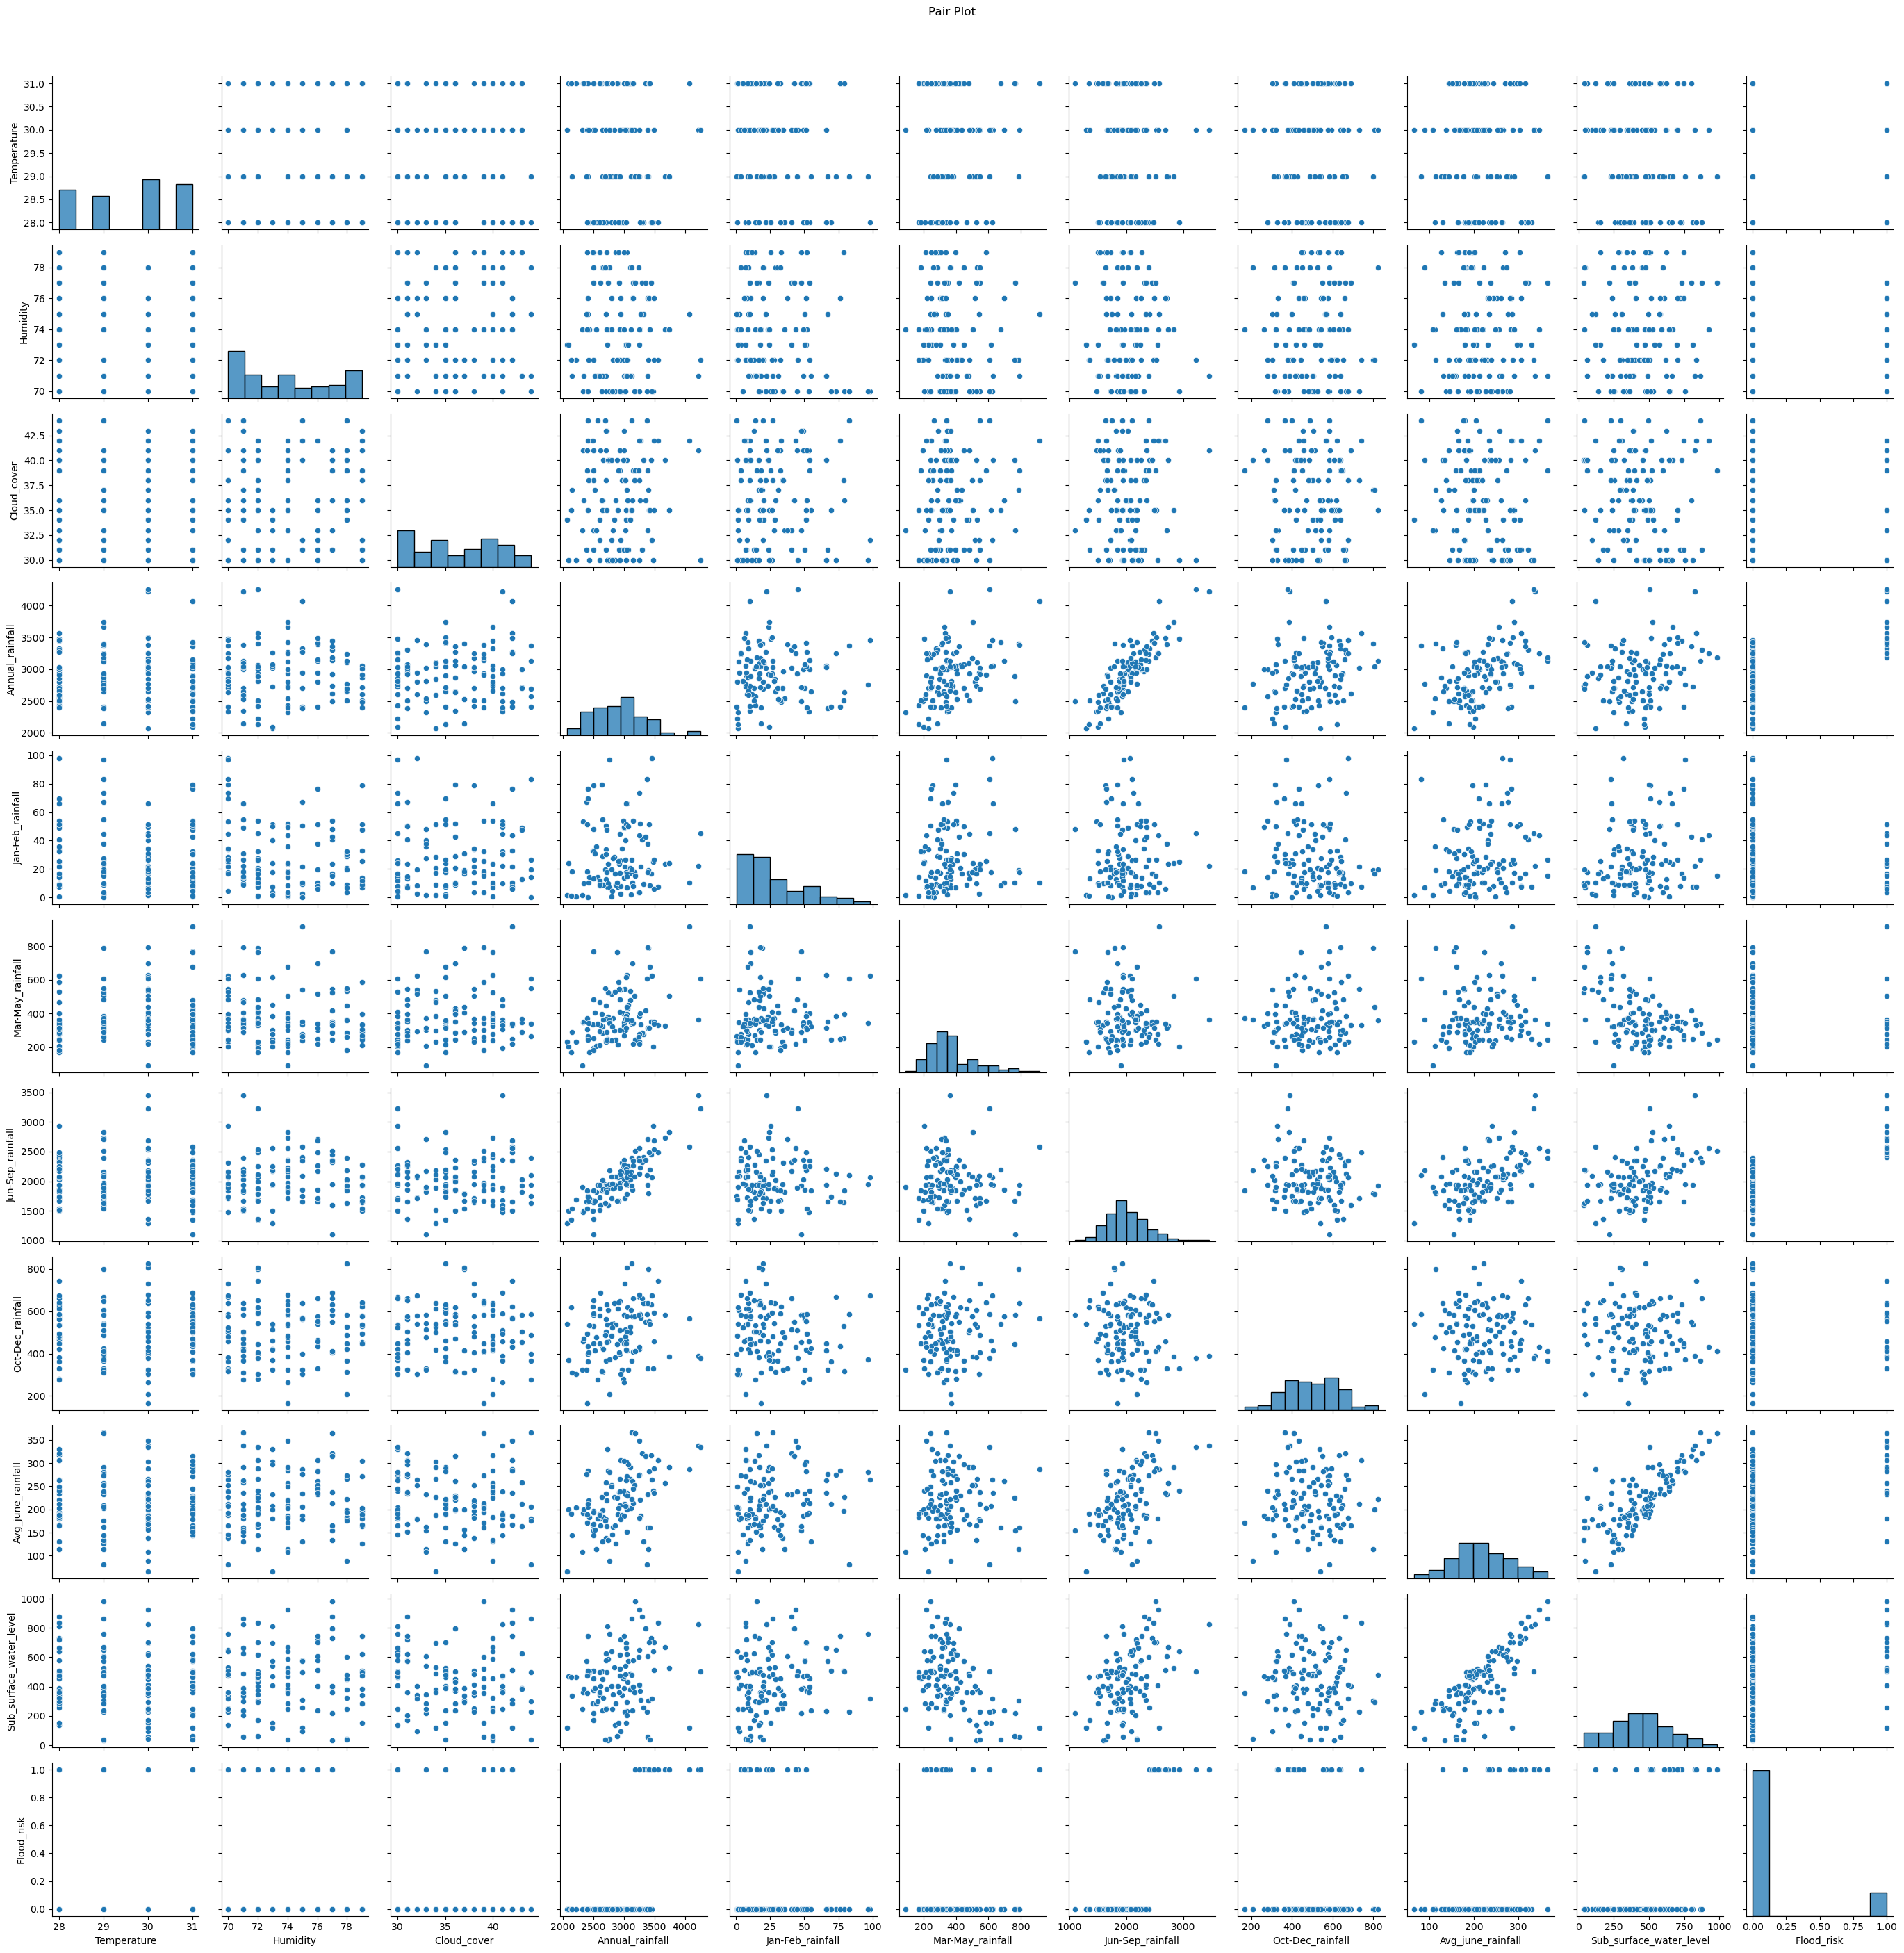

In [40]:
# Pair Plot
sns.pairplot(df)
plt.suptitle("Pair Plot", y=1.02)
plt.tight_layout()
plt.show()

In [43]:
# Handling Outliers
print("Handling Outliers")

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)

Handling Outliers


In [45]:
# Feature Engineering
print("Feature Engineering")

df["Humidity_temp_ratio"] = df["Humidity"] / (df["Temperature"])
df

Feature Engineering


,Temperature,Humidity,Cloud_cover,Annual_rainfall,Jan-Feb_rainfall,Mar-May_rainfall,Jun-Sep_rainfall,Oct-Dec_rainfall,Avg_june_rainfall,Sub_surface_water_level,Flood_risk,Humidity_temp_ratio
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9,0,2.413793
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4,1,2.678571
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9,0,2.678571
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5,0,2.448276
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9,0,2.387097
...,...,...,...,...,...,...,...,...,...,...,...,...
110,28,71,30,3035.1,66.2,313.5,2209.1,446.3,262.833333,664.3,0,2.535714
111,29,71,37,2151.1,18.3,287.4,1535.6,309.8,143.433333,335.0,0,2.448276
112,30,74,42,3255.4,43.9,218.5,2561.2,431.8,347.566667,923.4,1,2.466667
113,31,71,31,3046.4,14.9,364.5,2164.8,502.1,151.466667,203.4,0,2.290323


In [47]:
# Splitting Dependent And Independent
print("Splitting Dependent And Independent")

X = df.drop(columns=["Flood_risk","Humidity_temp_ratio"])
y = df["Flood_risk"]

Splitting Dependent And Independent


In [49]:
X

,Temperature,Humidity,Cloud_cover,Annual_rainfall,Jan-Feb_rainfall,Mar-May_rainfall,Jun-Sep_rainfall,Oct-Dec_rainfall,Avg_june_rainfall,Sub_surface_water_level
0,29,70,30,3248.6,73.4,386.2,2122.8,666.1,274.866667,649.9
1,28,75,40,3326.6,9.3,275.7,2403.4,638.2,130.300000,256.4
2,28,75,42,3271.2,21.7,336.3,2343.0,570.1,186.200000,308.9
3,29,71,44,3129.7,26.7,339.4,2398.2,365.3,366.066667,862.5
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9
...,...,...,...,...,...,...,...,...,...,...
110,28,71,30,3035.1,66.2,313.5,2209.1,446.3,262.833333,664.3
111,29,71,37,2151.1,18.3,287.4,1535.6,309.8,143.433333,335.0
112,30,74,42,3255.4,43.9,218.5,2561.2,431.8,347.566667,923.4
113,31,71,31,3046.4,14.9,364.5,2164.8,502.1,151.466667,203.4


In [51]:
# Feature Scaling
print("Feature Scaling")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Feature Scaling


In [53]:
# Train Test Split
print("Train Test Split")
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Train Test Split


In [65]:
y_test.value_counts()

Flood_risk
0    20
1     3
Name: count, dtype: int64

In [67]:
y_train.value_counts()

Flood_risk
0    79
1    13
Name: count, dtype: int64

In [69]:
X_train

,Temperature,Humidity,Cloud_cover,Annual_rainfall,Jan-Feb_rainfall,Mar-May_rainfall,Jun-Sep_rainfall,Oct-Dec_rainfall,Avg_june_rainfall,Sub_surface_water_level
31,29,72,37,3403.0,19.4,690.625,1797.8,797.7,113.666667,305.5
67,29,76,33,3392.7,37.8,312.500,2711.4,331.0,232.133333,606.4
93,31,76,35,3410.8,51.4,313.900,2493.0,552.5,281.666667,703.7
109,30,78,35,3131.8,19.6,360.900,1928.0,823.3,222.500000,476.9
22,28,70,30,3484.7,25.3,202.300,2928.4,328.6,240.833333,642.5
...,...,...,...,...,...,...,...,...,...,...
106,30,76,42,3489.6,6.1,338.400,2688.5,456.5,235.300000,513.2
14,30,73,33,3024.5,40.4,303.100,2167.0,514.0,232.033333,541.6
92,31,74,35,2717.7,17.8,245.600,1823.1,631.3,219.033333,498.1
51,31,70,41,2334.8,53.4,347.600,1477.7,456.1,192.233333,362.1


In [71]:
y_train

31     0
67     1
93     1
109    0
22     1
      ..
106    1
14     0
92     0
51     0
102    0
Name: Flood_risk, Length: 92, dtype: int64

In [73]:
X_test

,Temperature,Humidity,Cloud_cover,Annual_rainfall,Jan-Feb_rainfall,Mar-May_rainfall,Jun-Sep_rainfall,Oct-Dec_rainfall,Avg_june_rainfall,Sub_surface_water_level
81,31,72,30,2223.3,0.8,230.6,1689.2,302.7,204.066667,464.0
4,31,74,40,2741.6,23.4,378.5,1881.5,458.1,283.400000,586.9
40,30,78,34,3111.1,20.5,532.0,2031.8,526.7,265.866667,380.1
69,31,78,41,2703.5,30.5,447.7,1860.7,364.6,178.433333,246.2
10,28,73,30,2726.7,7.3,249.7,1934.0,535.7,330.000000,809.4
45,28,72,42,3565.5,7.3,331.2,2485.7,741.3,306.333333,836.0
70,31,73,31,3076.8,50.1,450.6,2254.6,321.5,296.533333,572.1
66,28,71,44,2569.1,14.4,339.6,1937.3,277.8,180.566667,296.8
47,30,73,34,3039.2,51.3,385.5,2183.7,418.7,303.400000,697.9
11,28,77,40,3451.3,16.9,351.1,2453.1,630.2,316.066667,730.9


In [75]:
y_test

81     0
4      0
40     0
69     0
10     0
45     1
70     0
66     0
47     0
11     1
100    0
36     0
84     0
113    0
18     0
0      0
72     0
26     0
105    0
53     0
94     0
112    1
12     0
Name: Flood_risk, dtype: int64

## Model Building

In [100]:
model_1 = LogisticRegression( C=0.01, solver='liblinear')
model_2 = KNeighborsClassifier(metric='manhattan', n_neighbors=10)
model_3 = DecisionTreeClassifier(criterion = 'entropy',max_depth = 30, splitter = 'best',max_features = 'sqrt', min_samples_leaf = 1)
model_4 = RandomForestClassifier(n_estimators=88, max_depth = 15, random_state = 50)
model_5 = xgboost.XGBClassifier()
model_6 = AdaBoostClassifier(n_estimators=50, learning_rate = 1.0, random_state=42)
model_7 = GradientBoostingClassifier(n_estimators=300, learning_rate=0.2, max_depth = 5, min_samples_split = 5, subsample = 0.7, random_state = 42)


### Logistic Regression

In [103]:
model_1.fit(X_train,y_train)

LogisticRegression(C=0.01, solver='liblinear')

In [105]:
y_sample_train1 = model_1.predict(X_scaled)
y_pred_train1 = model_1.predict(X_train)
y_pred_test1 = model_1.predict(X_test)

In [107]:
sample_acc1 = accuracy_score(y,y_sample_train1)
train_acc1 = accuracy_score(y_train,y_pred_train1)
test_acc1 = accuracy_score(y_test,y_pred_test1)

In [109]:
print("Train Accuracy :",train_acc1)
print("Test Accuracy :",test_acc1)
print("Sample Accuracy :",sample_acc1)

Train Accuracy : 0.9782608695652174
Test Accuracy : 0.9565217391304348
Sample Accuracy : 0.46956521739130436


In [111]:
print("Cross_val_score :",cross_val_score(model_1,X_test,y_test, cv=5).mean())

Cross_val_score : 0.8800000000000001


In [113]:
confusion_matrix(y_test,y_pred_test1)

array([[20,  0],
       [ 1,  2]], dtype=int64)

### KNN

In [116]:
pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier())
model_2 = pipeline.fit(X_train, y_train)

In [118]:
y_sample_train2 = model_2.predict(X_scaled)
y_pred_train2 = model_2.predict(X_train)
y_pred_test2 = model_2.predict(X_test)

In [120]:
sample_acc2 = accuracy_score(y,y_sample_train2)
train_acc2 = accuracy_score(y_train,y_pred_train2)
test_acc2 = accuracy_score(y_test,y_pred_test2)

In [122]:
print("Train Accuracy :",train_acc2)
print("Test Accuracy :",test_acc2)
print("Sample Accuracy :",sample_acc2)

Train Accuracy : 0.9239130434782609
Test Accuracy : 0.9130434782608695
Sample Accuracy : 0.8608695652173913


In [124]:
print("Cross_val_score :",cross_val_score(model_2,X_test,y_test, cv=5).mean())

Cross_val_score : 0.8800000000000001


In [126]:
confusion_matrix(y_test,y_pred_test2)

array([[20,  0],
       [ 2,  1]], dtype=int64)

### Hyperparametric Tuning

In [129]:
knn = KNeighborsClassifier()

In [131]:
param_grid = {
    'n_neighbors' : [3,5,7,9,11,13,15],
    'weights' : ['uniform','distance'],
    'metric' : ['euclidean','manhattan', 'minkowaki']
}

In [133]:
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, cv = 5, scoring = 'accuracy', n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowaki'],
                         'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=1)

In [134]:
print('Best Hypermaters: ',grid_search.best_params_)
print('Best Accuracy: ',grid_search.best_score_)

Best Hypermaters:  {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
Best Accuracy:  0.9783625730994151


### Decision Tree

In [138]:
model_3.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=30, max_features='sqrt')

In [140]:
y_sample_train3 = model_3.predict(X_scaled)
y_pred_train3 = model_3.predict(X_train)
y_pred_test3 = model_3.predict(X_test)

In [142]:
sample_acc3 = accuracy_score(y,y_sample_train3)
train_acc3 = accuracy_score(y_train,y_pred_train3)
test_acc3 = accuracy_score(y_test,y_pred_test3)

In [144]:
print("Train Accuracy :",train_acc3)
print("Test Accuracy :",test_acc3)
print("Sample Accuracy :",sample_acc3)

Train Accuracy : 1.0
Test Accuracy : 0.9130434782608695
Sample Accuracy : 0.8608695652173913


In [146]:
print("Cross_val_score :",cross_val_score(model_3,X_test,y_test, cv=5).mean())

Cross_val_score : 0.8400000000000001


In [148]:
confusion_matrix(y_test,y_pred_test3)

array([[20,  0],
       [ 2,  1]], dtype=int64)

### RandomForestClassifier

In [151]:
model_4.fit(X_train,y_train)

RandomForestClassifier(max_depth=15, n_estimators=88, random_state=50)

In [152]:
y_sample_train4 = model_4.predict(X_scaled)
y_pred_train4 = model_4.predict(X_train)
y_pred_test4 = model_4.predict(X_test)

In [154]:
sample_acc4 = accuracy_score(y,y_sample_train4)
train_acc4 = accuracy_score(y_train,y_pred_train4)
test_acc4 = accuracy_score(y_test,y_pred_test4)

In [157]:
print("Train Accuracy :",train_acc4)
print("Test Accuracy :",test_acc4)
print("Sample Accuracy :",sample_acc4)

Train Accuracy : 1.0
Test Accuracy : 1.0
Sample Accuracy : 0.8608695652173913


In [159]:
print("Cross_val_score :",cross_val_score(model_4,X_test,y_test, cv=5).mean())

Cross_val_score : 0.9199999999999999


In [160]:
confusion_matrix(y_test,y_pred_test4)

array([[20,  0],
       [ 0,  3]], dtype=int64)

### XGBClassifier

In [162]:
model_5.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [166]:
y_sample_train5 = model_5.predict(X_scaled)
y_pred_train5 = model_5.predict(X_train)
y_pred_test5 = model_5.predict(X_test)

In [168]:
sample_acc5 = accuracy_score(y,y_sample_train5)
train_acc5 = accuracy_score(y_train,y_pred_train5)
test_acc5 = accuracy_score(y_test,y_pred_test5)

In [170]:
print("Train Accuracy :",train_acc5)
print("Test Accuracy :",test_acc5)
print("Sample Accuracy :",sample_acc5)

Train Accuracy : 1.0
Test Accuracy : 1.0
Sample Accuracy : 0.8608695652173913


In [172]:
print("Cross_val_score :",cross_val_score(model_5,X_test,y_test, cv=5).mean())

Cross_val_score : 0.8800000000000001


In [173]:
confusion_matrix(y_test,y_pred_test5)

array([[20,  0],
       [ 0,  3]], dtype=int64)

### AdaBoostClassifier

In [177]:
model_6.fit(X_train,y_train)

AdaBoostClassifier(random_state=42)

In [179]:
y_sample_train6 = model_6.predict(X_scaled)
y_pred_train6 = model_6.predict(X_train)
y_pred_test6 = model_6.predict(X_test)

In [181]:
sample_acc6 = accuracy_score(y,y_sample_train6)
train_acc6 = accuracy_score(y_train,y_pred_train6)
test_acc6 = accuracy_score(y_test,y_pred_test6)

In [183]:
print("Train Accuracy :",train_acc6)
print("Test Accuracy :",test_acc6)
print("Sample Accuracy :",sample_acc6)

Train Accuracy : 1.0
Test Accuracy : 1.0
Sample Accuracy : 0.8608695652173913


In [185]:
print("Cross_val_score :",cross_val_score(model_6,X_test,y_test, cv=5).mean())

Cross_val_score : 0.9199999999999999


In [187]:
confusion_matrix(y_test,y_pred_test6)

array([[20,  0],
       [ 0,  3]], dtype=int64)

### GradientBoostingClassifier

In [190]:
model_7.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.2, max_depth=5, min_samples_split=5,
                           n_estimators=300, random_state=42, subsample=0.7)

In [191]:
y_sample_train7 = model_7.predict(X_scaled)
y_pred_train7 = model_7.predict(X_train)
y_pred_test7 = model_7.predict(X_test)

In [192]:
sample_acc7 = accuracy_score(y,y_sample_train7)
train_acc7 = accuracy_score(y_train,y_pred_train7)
test_acc7 = accuracy_score(y_test,y_pred_test7)

In [193]:
print("Train Accuracy :",train_acc7)
print("Test Accuracy :",test_acc7)
print("Sample Accuracy :",sample_acc7)

Train Accuracy : 1.0
Test Accuracy : 1.0
Sample Accuracy : 0.8608695652173913


In [194]:
print("Cross_val_score :",cross_val_score(model_7,X_test,y_test, cv=5).mean())

Cross_val_score : 0.9199999999999999


In [200]:
confusion_matrix(y_test,y_pred_test7)

array([[20,  0],
       [ 0,  3]], dtype=int64)

### Model Testing

In [203]:
print(model_2.predict([[29, 74, 40, 3671.1, 23.7, 328, 2737.8, 581.7, 256.966666666667, 669.5]]))

[1]


In [205]:
print(model_2.predict([[28,	75,	40,	3326.6,	9.3,	275.7,	2403.4,	638.2,	130.3,	256.4]]))

[0]


### Model Deployment

In [208]:
with open('model_k.pkl','wb') as file:
    pickle.dump(model_2,file)
print("Model saved to model1.pkl")

Model saved to model1.pkl


In [210]:
with open('model_k.pkl','rb') as file :
    model_2 = pickle.load(file)